## Отчет по лабораторной работе № 6 по теме: "Нейронные сети. Алгоритмы с оптимизациями"
    Цель: подобрать архитектуру нейронной сети для построения графика функции f(x) = sin(x).
    Исходные данные: сгенерированные точки для построения синусоиды.

In [ ]:
# Optimazers SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
https://datascience.stackexchange.com/questions/19365/predict-sinus-with-keras-feed-forward-neural-network
https://medium.com/@krzysztofbalka/training-keras-lstm-to-generate-sine-function-2e3c0ca42c3b
http://www.100byte.ru/python/loss/loss.html
https://alexsosn.github.io/ml/2015/11/17/LSTM.html
https://www.youtube.com/watch?v=Kv4NyVW9IZ4

In [2]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
import math

# Simple Dense first try

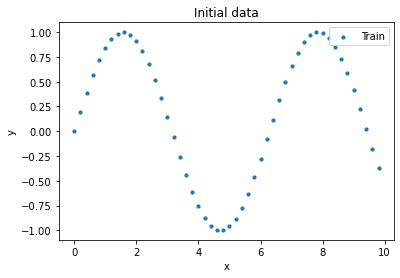

In [109]:
# Исходные данные
x = np.arange(0, 10, .2)
#x = np.arange(0, 10*np.pi, 0.1)
#x = np.arange(0, 50, .2)
y = np.sin(x)

plt.scatter(x, y, label="Train", s=10)
plt.legend(loc='upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Initial data")
plt.show()

In [3]:
model = Sequential()
model.add(Dense(2,input_shape=(1,), activation='sigmoid'))
model.add(Dense(1, activation='linear')) 
model.compile(optimizer='adam', metrics=['mae', 'acc'] , loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x, y, epochs=1000, batch_size=8, verbose=0)

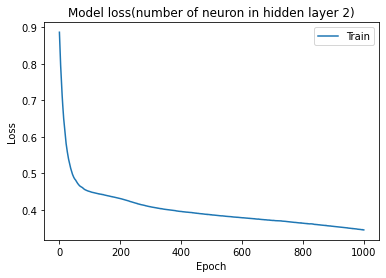

In [5]:
plt.plot(history.history['loss'], label="Train")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(number of neuron in hidden layer 2)")
plt.show()

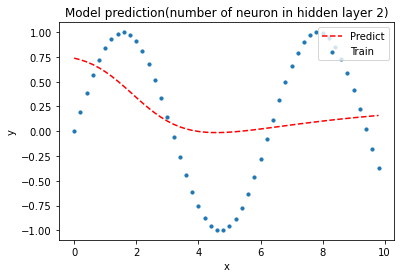

In [6]:
plt.scatter(x, y, label="Train", s=10)
plt.plot(x, model.predict(x),'r--', label="Prediction")
plt.legend(loc='upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(number of neuron in hidden layer 2)")
plt.show()

# Simple Dense second try

In [30]:
from tensorflow.keras.optimizers import SGD, Adam
opt = Adam(learning_rate=0.1)

model2 = Sequential()
model2.add(Dense(10,input_shape=(1,), activation='sigmoid'))
model2.add(Dense(1, activation='linear')) 
model2.compile(optimizer=opt, metrics=['mae', 'acc'] , loss='mean_squared_error')
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [31]:
history2 = model2.fit(x, y, epochs=1000, batch_size=8, verbose=0)

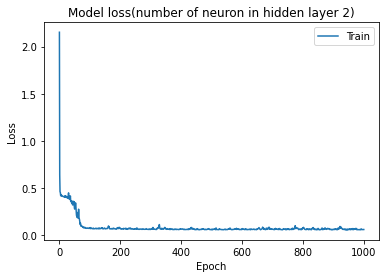

In [32]:
plt.plot(history2.history['loss'], label="Train")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(number of neuron in hidden layer 10)")
plt.show()

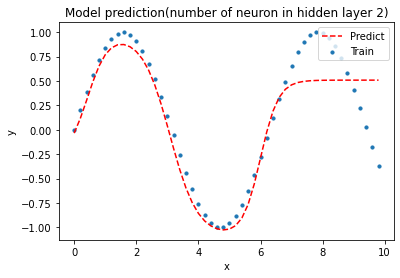

In [33]:
plt.scatter(x, y, label="Train", s=10)
plt.plot(x, model2.predict(x),'r--', label="Prediction")
plt.legend(loc='upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(number of neuron in hidden layer 10)")
plt.show()

In [46]:
# Исходные данные
x2 = np.arange(0, 30, .1)
#x = np.arange(0, 10*np.pi, 0.1)
#x = np.arange(0, 50, .2)
y2 = np.sin(x2)

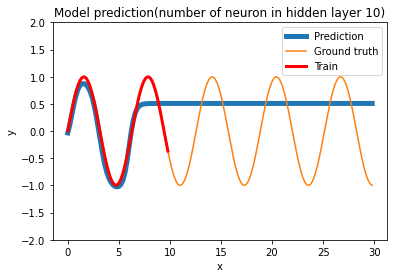

In [48]:
plt.plot(x2, model2.predict(x2), label="Prediction", linewidth=5)
plt.plot(x2, y2, label="Ground truth")
plt.plot(x, y, label="Train", color="red",linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(number of neuron in hidden layer 10)")
plt.ylim(-2, 2)
plt.show()

# LTSM first try

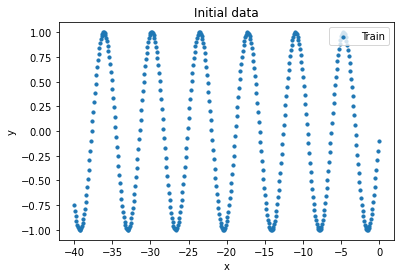

In [131]:
# Исходные данные
x = np.arange(-40, 0, .1)
y = np.sin(x)

plt.scatter(x, y, label="Train", s=10)
plt.legend(loc='upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Initial data")
plt.show()

X.shape = (390, 10, 1)
y.shape = (390,)
Epoch 1/80
13/13 [==============================] - 2s 9ms/step - loss: 0.3835
Epoch 2/80
13/13 [==============================] - 0s 8ms/step - loss: 0.3173
Epoch 3/80
13/13 [==============================] - 0s 8ms/step - loss: 0.2724
Epoch 4/80
13/13 [==============================] - 0s 8ms/step - loss: 0.2481
Epoch 5/80
13/13 [==============================] - 0s 9ms/step - loss: 0.2354
Epoch 6/80
13/13 [==============================] - 0s 8ms/step - loss: 0.2261
Epoch 7/80
13/13 [==============================] - 0s 8ms/step - loss: 0.2179
Epoch 8/80
13/13 [==============================] - 0s 9ms/step - loss: 0.2101
Epoch 9/80
13/13 [==============================] - 0s 9ms/step - loss: 0.2019
Epoch 10/80
13/13 [==============================] - 0s 10ms/step - loss: 0.1931
Epoch 11/80
13/13 [==============================] - 0s 8ms/step - loss: 0.1832
Epoch 12/80
13/13 [==============================] - 0s 8ms/step - loss: 0.1723
Epoch 13

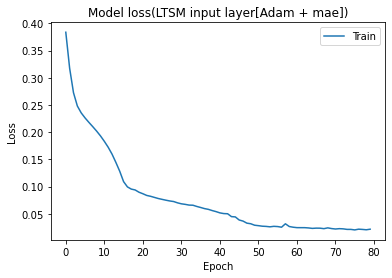

In [127]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer='adam', loss='mae')

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-40, 0, .1)
train_seq = np.sin(xaxis)
n_steps = 10
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (390, 10, 1)
y.shape = (390,)

history = model_lstm.fit(X, y, epochs=80, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM 40 points)")
plt.show()

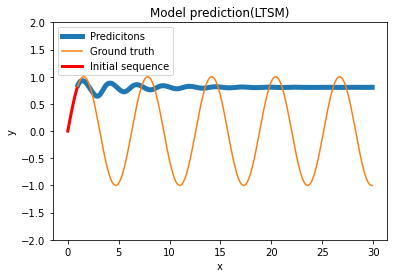

In [129]:
test_xaxis = np.arange(0, 30, 0.1)

calc_y = np.sin(test_xaxis)
test_y = calc_y[:n_steps]
results = []

for i in range( len(test_xaxis) - n_steps):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
    model_lstm
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM 40 points)")
plt.ylim(-2, 2)
plt.show()

# LTSM second try(увеличение кол-ва точек)

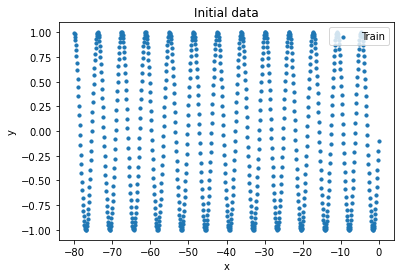

In [150]:
# Исходные данные
x = np.arange(-80, 0, .1)
y = np.sin(x)

plt.scatter(x, y, label="Train", s=10)
plt.legend(loc='upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Initial data")
plt.show()

X.shape = (788, 12, 1)
y.shape = (788,)
Epoch 1/80
25/25 [==============================] - 2s 9ms/step - loss: 0.6096
Epoch 2/80
25/25 [==============================] - 0s 10ms/step - loss: 0.4946
Epoch 3/80
25/25 [==============================] - 0s 9ms/step - loss: 0.3983
Epoch 4/80
25/25 [==============================] - 0s 9ms/step - loss: 0.3469
Epoch 5/80
25/25 [==============================] - 0s 8ms/step - loss: 0.3044
Epoch 6/80
25/25 [==============================] - 0s 8ms/step - loss: 0.2557
Epoch 7/80
25/25 [==============================] - 0s 8ms/step - loss: 0.1877
Epoch 8/80
25/25 [==============================] - 0s 8ms/step - loss: 0.1231
Epoch 9/80
25/25 [==============================] - 0s 8ms/step - loss: 0.0990
Epoch 10/80
25/25 [==============================] - 0s 9ms/step - loss: 0.0918
Epoch 11/80
25/25 [==============================] - 0s 9ms/step - loss: 0.0863
Epoch 12/80
25/25 [==============================] - 0s 9ms/step - loss: 0.0814
Epoch 13

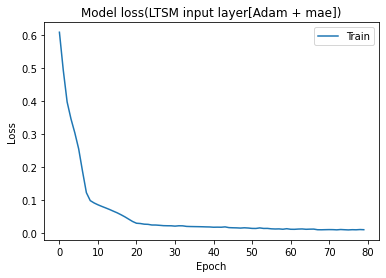

In [148]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer='adam', loss='mae')

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-80, 0, .1)
train_seq = np.sin(xaxis)
n_steps = 12
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (788, 12, 1)
y.shape = (788,)

history = model_lstm.fit(X, y, epochs=80, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM 80 points)")
plt.show()

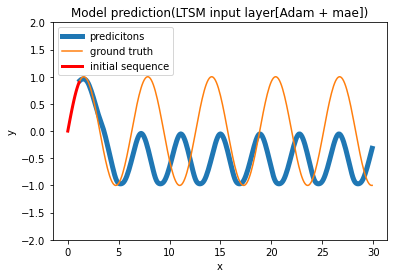

In [149]:
test_xaxis = np.arange(0, 30, 0.1)

calc_y = np.sin(test_xaxis)
test_y = calc_y[:n_steps]
results = []

for i in range( len(test_xaxis) - n_steps):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
    model_lstm
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM 80 points)")
plt.ylim(-2, 2)
plt.show()

# SGD try

X.shape = (3464, 36, 1)
y.shape = (3464,)
Epoch 1/80
109/109 [==============================] - 4s 19ms/step - loss: 0.5972
Epoch 2/80
109/109 [==============================] - 2s 16ms/step - loss: 0.5307
Epoch 3/80
109/109 [==============================] - 2s 17ms/step - loss: 0.4730
Epoch 4/80
109/109 [==============================] - 2s 15ms/step - loss: 0.4270
Epoch 5/80
109/109 [==============================] - 2s 14ms/step - loss: 0.3925
Epoch 6/80
109/109 [==============================] - 1s 12ms/step - loss: 0.3666
Epoch 7/80
109/109 [==============================] - 1s 14ms/step - loss: 0.3470
Epoch 8/80
109/109 [==============================] - 1s 12ms/step - loss: 0.3316
Epoch 9/80
109/109 [==============================] - 1s 13ms/step - loss: 0.3194
Epoch 10/80
109/109 [==============================] - 2s 15ms/step - loss: 0.3092
Epoch 11/80
109/109 [==============================] - 1s 13ms/step - loss: 0.3003
Epoch 12/80
109/109 [==============================] -

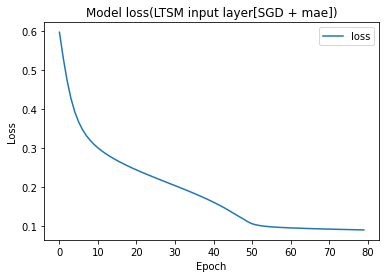

In [5]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD

opt = SGD(lr = 0.0001, momentum = 0.9)

model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer = opt, loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-350, 0, 0.1)
train_seq = train_function(xaxis)
n_steps = 36
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (3464, 36, 1)
y.shape = (3464,)

history = model_lstm.fit(X, y, epochs=80, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM input layer[SGD + mae])")
plt.show()

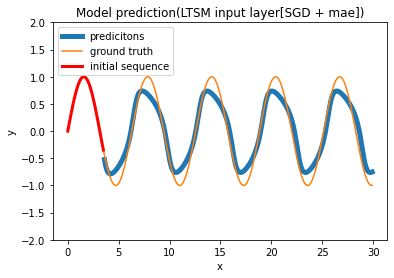

In [7]:
test_xaxis = np.arange(0, 30, 0.1)

calc_y = np.sin(test_xaxis)
test_y = calc_y[:n_steps]
results = []

for i in range( len(test_xaxis) - n_steps):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
    model_lstm
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="predicitons",linewidth=5)
plt.plot(test_xaxis, calc_y, label="ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[SGD + mae])")
plt.ylim(-2, 2)
plt.show()

# True LTSM try

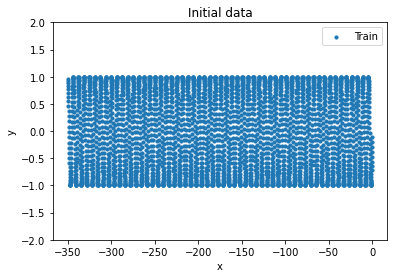

In [3]:
def train_function(x):
    return np.sin(x)

xaxis = np.arange(-350, 0, 0.1)
train_seq = train_function(xaxis)

plt.scatter(xaxis, train_seq, label="Train", s=10)
plt.legend(loc='upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Initial data")
plt.ylim(-2, 2)
plt.show()

X.shape = (3484, 36, 1)
y.shape = (3484,)
Epoch 1/50
109/109 [==============================] - 4s 18ms/step - loss: 0.5106
Epoch 2/50
109/109 [==============================] - 2s 17ms/step - loss: 0.2094
Epoch 3/50
109/109 [==============================] - 2s 16ms/step - loss: 0.0518
Epoch 4/50
109/109 [==============================] - 2s 16ms/step - loss: 0.0239
Epoch 5/50
109/109 [==============================] - 2s 15ms/step - loss: 0.0163
Epoch 6/50
109/109 [==============================] - 2s 15ms/step - loss: 0.0113
Epoch 7/50
109/109 [==============================] - 2s 16ms/step - loss: 0.0084
Epoch 8/50
109/109 [==============================] - 2s 16ms/step - loss: 0.0081
Epoch 9/50
109/109 [==============================] - 2s 15ms/step - loss: 0.0066
Epoch 10/50
109/109 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 11/50
109/109 [==============================] - 2s 14ms/step - loss: 0.0062
Epoch 12/50
109/109 [==============================] -

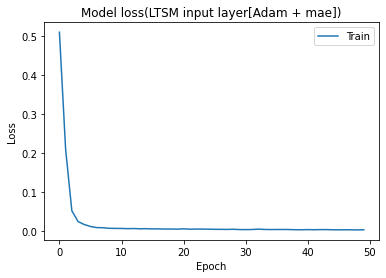

In [90]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer='adam', loss='mae')

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-350, 0, 0.1)
train_seq = np.sin(xaxis)
n_steps = 36
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (3484, 36, 1)
y.shape = (3484,)

history = model_lstm.fit(X, y, epochs=50, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM 350 points)")
plt.show()

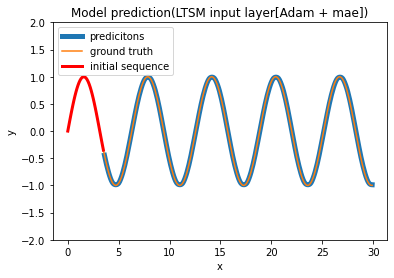

In [103]:
test_xaxis = np.arange(0, 30, 0.1)

calc_y = np.sin(test_xaxis)
test_y = calc_y[:n_steps]
results = []

for i in range( len(test_xaxis) - n_steps):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
    model_lstm
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[Adam + mae])")
plt.ylim(-2, 2)
plt.show()

# LSTM
    Для выполнения данной задачи наиболее подходящей архитектурой является нейронная сеть LSTM. 
    LSTM - сети долгой короткосрочной памяти. LSTM устроены гораздо слежнее нежели обычные 
    нейронные сети. В этих сетях элементом сети является не один и более нейронов, а целый набор слоев
    которые взаимодействуют друг с другом по определенным правилам. Такие наборы называются ячейками 
    в сетях LSTM(LSTM cell)

Epoch 1/20
98/98 [==============================] - 3s 12ms/step - loss: 0.4578
Epoch 2/20
98/98 [==============================] - 1s 11ms/step - loss: 0.1312
Epoch 3/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0717
Epoch 4/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0332
Epoch 5/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0166
Epoch 6/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0129
Epoch 7/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0119
Epoch 8/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0088
Epoch 9/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0083
Epoch 10/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0083
Epoch 11/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0078A: 0s -
Epoch 12/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0066
Epoch 13/20
98/98 [==============

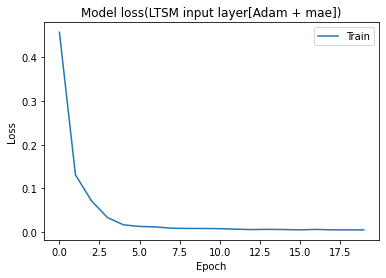

In [60]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer='adam', loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
#print("X.shape = {}".format(X.shape))
#print("y.shape = {}".format(y.shape))

X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model_lstm.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM input layer[Adam + mae])")
plt.show()

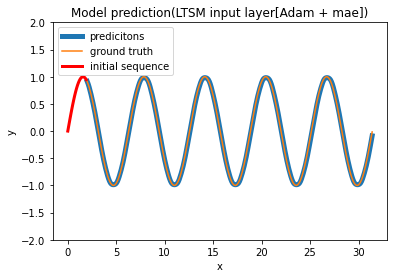

In [61]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)

def test_function(x):
    return np.sin(x)

calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []

for i in range( len(test_xaxis) - n_steps):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
    
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[Adam + mae])")
plt.ylim(-2, 2)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


X.shape = (3122, 20, 1)
y.shape = (3122,)
Epoch 1/20
98/98 [==============================] - 3s 13ms/step - loss: 0.1719
Epoch 2/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0842
Epoch 3/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0760
Epoch 4/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0692
Epoch 5/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0527
Epoch 6/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0292
Epoch 7/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0186
Epoch 8/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0170
Epoch 9/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0127
Epoch 10/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0148
Epoch 11/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0094
Epoch 12/20
98/98 [==============================] - 1s 10ms/step - loss: 0.

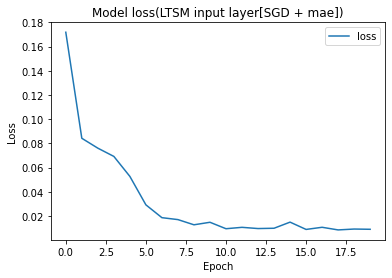

In [67]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr = 0.01, momentum = 0.9)

model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer = opt, loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model_lstm.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM input layer[SGD + mae])")
plt.show()

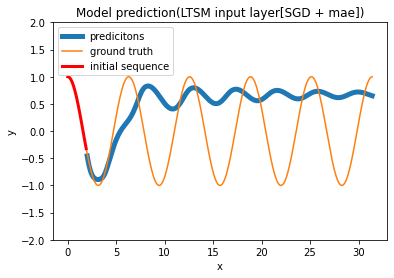

In [66]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[SGD + mae])")
plt.ylim(-2, 2)
plt.show()

X.shape = (3122, 20, 1)
y.shape = (3122,)
Epoch 1/20
98/98 [==============================] - 3s 12ms/step - loss: 0.2620
Epoch 2/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0798
Epoch 3/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0499
Epoch 4/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0380
Epoch 5/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0312
Epoch 6/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0272
Epoch 7/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0232
Epoch 8/20
98/98 [==============================] - 1s 8ms/step - loss: 0.0210
Epoch 9/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0190
Epoch 10/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0174
Epoch 11/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0160
Epoch 12/20
98/98 [==============================] - 1s 10ms/step - loss: 0.01

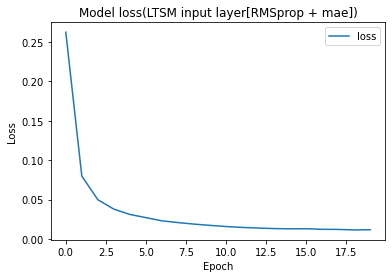

In [68]:
model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer = 'RMSprop', loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model_lstm.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM input layer[RMSprop + mae])")
plt.show()

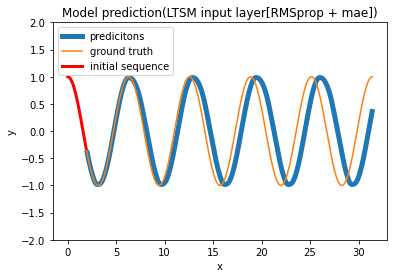

In [69]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[RMSprop + mae])")
plt.ylim(-2, 2)
plt.show()

X.shape = (3122, 20, 1)
y.shape = (3122,)
Epoch 1/20
98/98 [==============================] - 3s 12ms/step - loss: 0.6363
Epoch 2/20
98/98 [==============================] - 1s 12ms/step - loss: 0.6343
Epoch 3/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6323
Epoch 4/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6301
Epoch 5/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6279
Epoch 6/20
98/98 [==============================] - 1s 8ms/step - loss: 0.6256
Epoch 7/20
98/98 [==============================] - 1s 9ms/step - loss: 0.6232
Epoch 8/20
98/98 [==============================] - 1s 11ms/step - loss: 0.6207
Epoch 9/20
98/98 [==============================] - 1s 11ms/step - loss: 0.6182
Epoch 10/20
98/98 [==============================] - 1s 11ms/step - loss: 0.6156
Epoch 11/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6129
Epoch 12/20
98/98 [==============================] - 1s 10ms/step - loss: 0.61

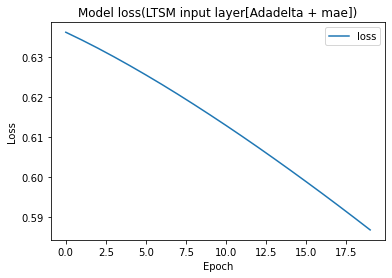

In [70]:
model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer = 'Adadelta', loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))


X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model_lstm.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM input layer[Adadelta + mae])")
plt.show()

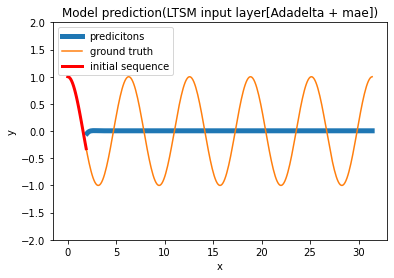

In [71]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[Adadelta + mae])")
plt.ylim(-2, 2)
plt.show()

X.shape = (3122, 20, 1)
y.shape = (3122,)
Epoch 1/20
98/98 [==============================] - 3s 13ms/step - loss: 0.4094
Epoch 2/20
98/98 [==============================] - 1s 12ms/step - loss: 0.3933
Epoch 3/20
98/98 [==============================] - 1s 12ms/step - loss: 0.3823
Epoch 4/20
98/98 [==============================] - 1s 11ms/step - loss: 0.3733
Epoch 5/20
98/98 [==============================] - 1s 12ms/step - loss: 0.3655
Epoch 6/20
98/98 [==============================] - 1s 11ms/step - loss: 0.3585
Epoch 7/20
98/98 [==============================] - 1s 12ms/step - loss: 0.3521
Epoch 8/20
98/98 [==============================] - 1s 11ms/step - loss: 0.3461
Epoch 9/20
98/98 [==============================] - 1s 10ms/step - loss: 0.3405
Epoch 10/20
98/98 [==============================] - 1s 10ms/step - loss: 0.3352
Epoch 11/20
98/98 [==============================] - 1s 9ms/step - loss: 0.3301
Epoch 12/20
98/98 [==============================] - 1s 9ms/step - loss: 0.32

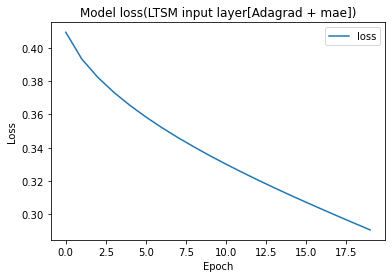

In [72]:
model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer = 'Adagrad', loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model_lstm.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM input layer[Adagrad + mae])")
plt.show()

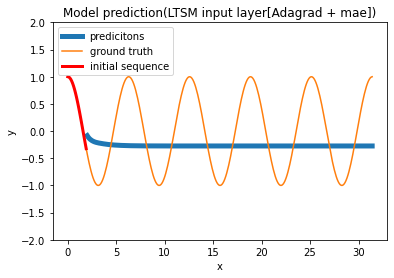

In [73]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[Adagrad + mae])")
plt.ylim(-2, 2)
plt.show()

Epoch 1/20
98/98 [==============================] - 3s 12ms/step - loss: 0.4804
Epoch 2/20
98/98 [==============================] - 1s 13ms/step - loss: 0.3026
Epoch 3/20
98/98 [==============================] - 1s 11ms/step - loss: 0.1589
Epoch 4/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0962
Epoch 5/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0870
Epoch 6/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0795
Epoch 7/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0723
Epoch 8/20
98/98 [==============================] - 1s 8ms/step - loss: 0.0636
Epoch 9/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0512
Epoch 10/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0335
Epoch 11/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0208
Epoch 12/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0172
Epoch 13/20
98/98 [====================

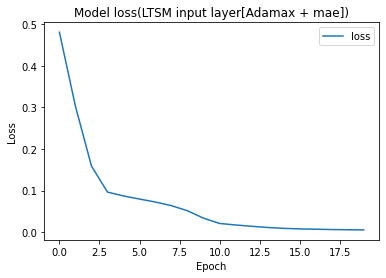

In [74]:
model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer = 'adamax', loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model_lstm.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM input layer[Adamax + mae])")
plt.show()

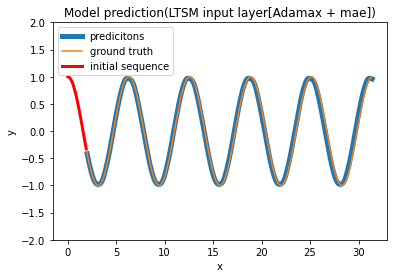

In [75]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[Adamax + mae])")
plt.ylim(-2, 2)
plt.show()

Epoch 1/20
98/98 [==============================] - 3s 14ms/step - loss: 0.3325
Epoch 2/20
98/98 [==============================] - 1s 12ms/step - loss: 0.1044
Epoch 3/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0502
Epoch 4/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0231
Epoch 5/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0150
Epoch 6/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0126
Epoch 7/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0107
Epoch 8/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0096
Epoch 9/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0088
Epoch 10/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0082
Epoch 11/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0077
Epoch 12/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0073
Epoch 13/20
98/98 [===================

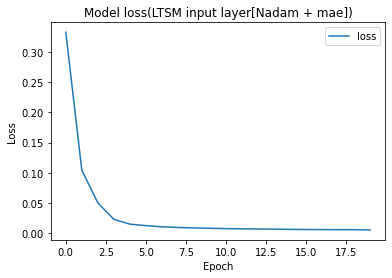

In [76]:
model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer = 'nadam', loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model_lstm.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM input layer[Nadam + mae])")
plt.show()

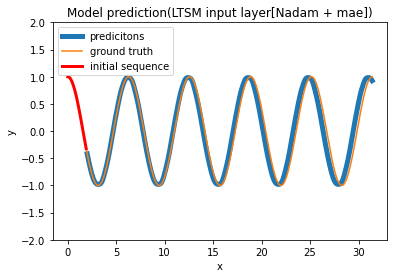

In [77]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[Nadam + mae])")
plt.ylim(-2, 2)
plt.show()

Epoch 1/20
98/98 [==============================] - 3s 14ms/step - loss: 0.6369
Epoch 2/20
98/98 [==============================] - 1s 11ms/step - loss: 0.6365
Epoch 3/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6361
Epoch 4/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6358
Epoch 5/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6354
Epoch 6/20
98/98 [==============================] - 1s 9ms/step - loss: 0.6350
Epoch 7/20
98/98 [==============================] - 1s 9ms/step - loss: 0.6346
Epoch 8/20
98/98 [==============================] - 1s 9ms/step - loss: 0.6343
Epoch 9/20
98/98 [==============================] - 1s 9ms/step - loss: 0.6339
Epoch 10/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6335
Epoch 11/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6330
Epoch 12/20
98/98 [==============================] - 1s 10ms/step - loss: 0.6326
Epoch 13/20
98/98 [======================

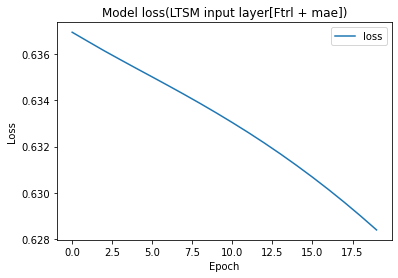

In [78]:
model_lstm = Sequential()
model_lstm .add(LSTM(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
model_lstm.compile(optimizer = 'ftrl', loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model_lstm.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(LTSM input layer[Ftrl + mae])")
plt.show()

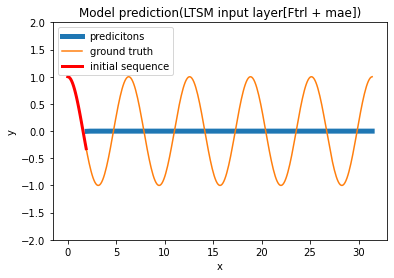

In [79]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediciton",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(LTSM input layer[Ftrl + mae])")
plt.ylim(-2, 2)
plt.show()

# GRU
    GRU - разновидность LSTM. В большинстве случаем GRU работают так же, как LSTM, самое значимое отличие в том, что 
    GRU немного быстрее и проще в эксплуатации (однако обладает немного меньшими выразительными возможностями).

Epoch 1/20
98/98 [==============================] - 3s 14ms/step - loss: 0.7952
Epoch 2/20
98/98 [==============================] - 1s 14ms/step - loss: 0.4338
Epoch 3/20
98/98 [==============================] - 1s 12ms/step - loss: 0.1733
Epoch 4/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0882
Epoch 5/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0671
Epoch 6/20
98/98 [==============================] - 1s 13ms/step - loss: 0.0528
Epoch 7/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0398
Epoch 8/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0352
Epoch 9/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0317
Epoch 10/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0282
Epoch 11/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0252
Epoch 12/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0216
Epoch 13/20
98/98 [==================

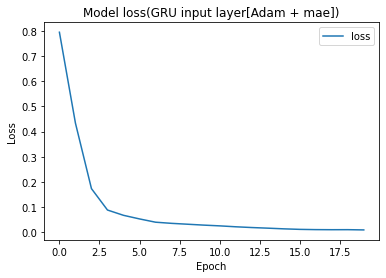

In [80]:
from tensorflow.keras.layers import GRU

model_lstm = Sequential()
model_lstm .add(GRU(10, activation='tanh'))
model_lstm .add(Dense(1, activation='tanh'))
#'adam nadam'  'mae' best result
model_lstm.compile(optimizer = 'adam', loss='mae')

def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model_lstm.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc="upper right")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Model loss(GRU input layer[Adam + mae])")
plt.show()

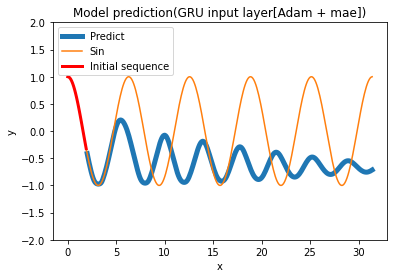

In [81]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model_lstm.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="Prediction",linewidth=5)
plt.plot(test_xaxis, calc_y, label="Ground truth)
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="Initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.title("Model prediction(GRU input layer[Adam + mae])")
plt.ylim(-2, 2)
plt.show()